In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

ds = pd.read_csv("./perfect_datasets/perfect_dataset_v3.csv")
ds_overview = pd.read_csv("./perfect_datasets/perfect_dataset_v1.csv")

cv = CountVectorizer(max_features=1000, stop_words="english")

vectors = cv.fit_transform(ds["tags"]).toarray()
c=0
similarity = cosine_similarity(vectors)

suggg = []
sug_d={"name":[]}
for i in similarity:
    a = sorted(list(enumerate(similarity[c])), reverse=True, key=lambda x: x[1])
    c2=0
    temp = []
    temp_c = {"name": f"{ds.iloc[a[0][0]].title}"}

    for j in range(1, 25):
        temp_c["name"] += f",{ds.iloc[a[j][0]].title}"

    suggg.append(temp)
    sug_d["name"].append(temp_c["name"])
    c+=1

# ------------------------------

d_ds = pd.DataFrame(sug_d)
d_ds.to_csv("./perfect_datasets/perfect_datasets_v4.csv", index=False)


### K-means

In [5]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

ds = pd.read_csv("./perfect_datasets/perfect_dataset_v3.csv")
ds_overview = pd.read_csv("./perfect_datasets/perfect_dataset_v1.csv")

cv = CountVectorizer(max_features=1000, stop_words="english")

vectors = cv.fit_transform(ds["tags"]).toarray()

similarity = cosine_similarity(vectors)

num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(similarity)

ds["cluster_label"] = cluster_labels

ds.to_csv("./perfect_datasets/perfect_datasets_v4_with_clusters.csv", index=False)

c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


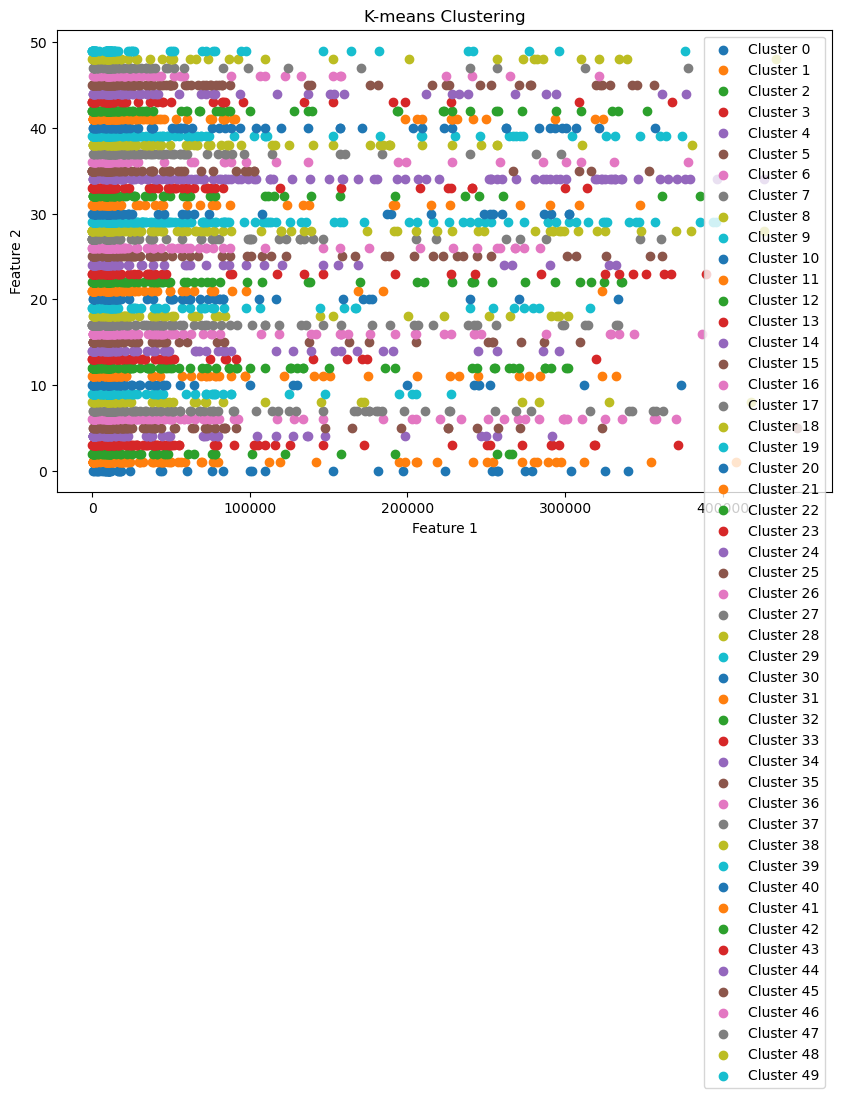

In [30]:
import matplotlib.pyplot as plt

c_ds = pd.read_csv("./perfect_datasets/perfect_datasets_v4_with_clusters.csv")

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = ds[ds["cluster_label"] == i]
    plt.scatter(cluster_data["movie_id"], cluster_data["cluster_label"], label=f'Cluster {i}')
    # print(cluster_data)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
# c_ds[c_ds["cluster_label"]==1]
# c_ds[c_ds["title"].str.startswith("Batman")]

In [ ]:
# not important code

# similarity = pd.read_csv("../perfect_datasets/similarity.csv")
# similarity
# temp = pd.DataFrame()
# temp["title"] = ds["title"].str.lower().str.split()
# temp["title"] = temp["title"].apply(lambda x: " ".join(x))
# temp["title"] = temp["title"].apply(lambda x: x.replace(":", ""))

# movie_sugg = []

# c = 0

# def recommend(movie):
#     global c
#     # if(ds[(ds["title"].str.lower()).str.startswith(movie.lower())].empty):
#     if(movie == ""):
#         print("Enter a movie name")
#         return
#     elif(ds[ds["title"].str.lower() == movie.lower()].empty):
#         for i in temp["title"]:
#             if(movie.lower() in i) and c==0:
#                 movie_sugg.append(ds.iloc[temp[temp["title"] == i].index[0]].title)
#         print("did you mean: ", movie_sugg, end="\n\n") if c==0 else print("No movie found")
#         c = 1
#         return
#     # index = ds[(ds["title"].str.lower()).str.startswith(movie.lower())].index[0]
#     index = ds[(ds["title"].str.lower()) == movie.lower()].index[0]
#     distance = similarity.iloc[index,:]
#     # distance = similarity[index]
#     movie_list = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1:11]

#     for i in movie_list:
#         print("Movie Id: " + str(ds.iloc[i[0]].movie_id))
#         print("Movie Name: " + ds.iloc[i[0]].title)
#         print("Movie Name: " + ds_overview.iloc[i[0]].overview, end="\n\n")
    
# inp = str(input("Enter the movie name: "))
# recommend(inp)

# if movie_sugg != []:
#         movie_re_input = str(input("Enter the movie name: "))
#         recommend(movie_re_input)
# d_ds = pd.DataFrame(sug_d)
# d_ds.to_csv("D:/DATA_Sets/fourth.csv", index=False)
# for el in d_ds["name"]:
#     for i in list(el.split(",")):
#         print(i, end=",")
#     print()